**Medical Cost Personal Insurance Project**

Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns    
•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Data collection

In [60]:
df = pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [61]:
# encoding the sex columns

df.replace({'sex':{'male':0,'female':1}},inplace=True)

# smoker columsn

df.replace({'smoker':{'yes':0,'no': 1}},inplace=True)

# for the region column

df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [62]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# EDA

Datasets has total 1338 rows and 7 columns

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Dataset doesnt have any value missing. So no null value present.
Dataset is having int, obj and float datatype which we will have to tranform as per requirement

In [20]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


There is a big gap between 75% and max value in the bmi variable. So outliers are present.

In [22]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker     -1.464766
region      0.048975
charges     1.515880
dtype: float64

# Visualization

Text(0.5, 9.444444444444438, 'Age')

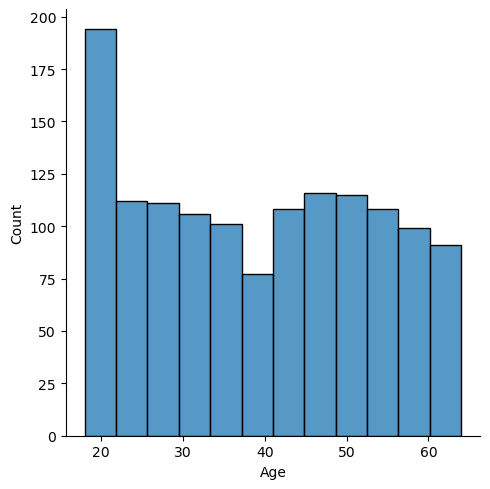

In [25]:
sns.displot(df['age'])
plt.xlabel('Age')

<Axes: xlabel='sex', ylabel='count'>

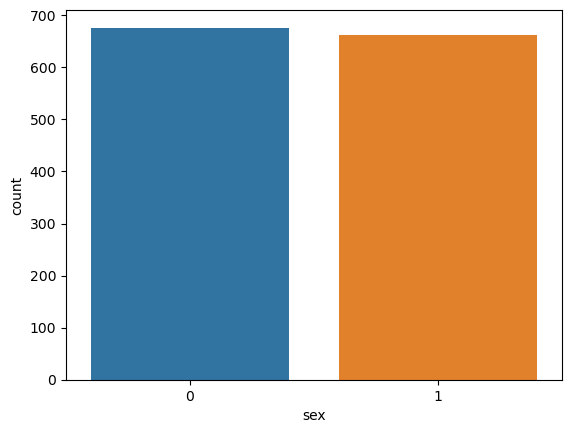

In [31]:
sns.countplot(x = 'sex', data = df)

No of male and female are nearly same

<Axes: xlabel='smoker', ylabel='count'>

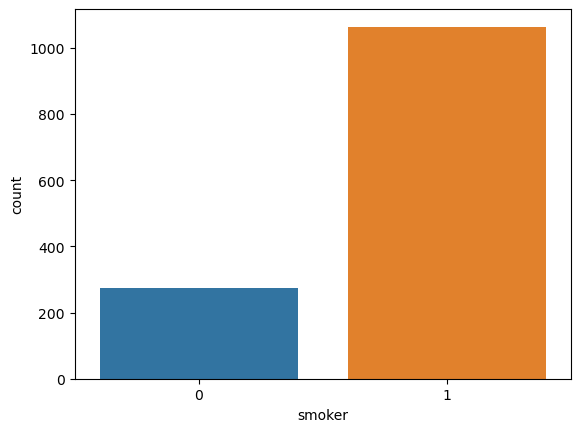

In [33]:
sns.countplot(x = 'smoker', data = df)

The number of smokers are large in numbers as compare to non-smokers

<Axes: xlabel='children', ylabel='count'>

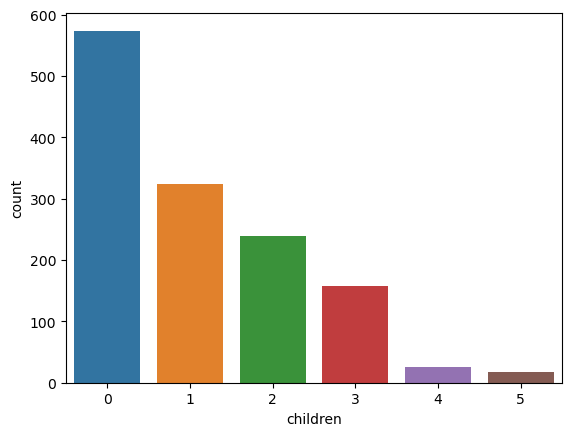

In [35]:
sns.countplot(x = 'children', data=df)

no of childens 

<Axes: xlabel='region', ylabel='count'>

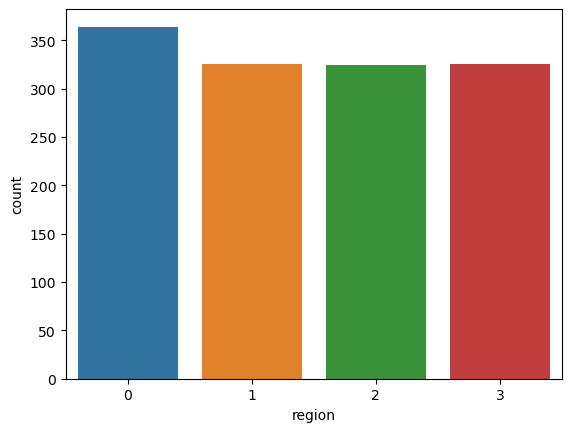

In [37]:
sns.countplot(x = 'region', data = df)

age            Axes(0.125,0.653529;0.227941x0.226471)
sex         Axes(0.398529,0.653529;0.227941x0.226471)
bmi         Axes(0.672059,0.653529;0.227941x0.226471)
children       Axes(0.125,0.381765;0.227941x0.226471)
smoker      Axes(0.398529,0.381765;0.227941x0.226471)
region      Axes(0.672059,0.381765;0.227941x0.226471)
charges            Axes(0.125,0.11;0.227941x0.226471)
dtype: object

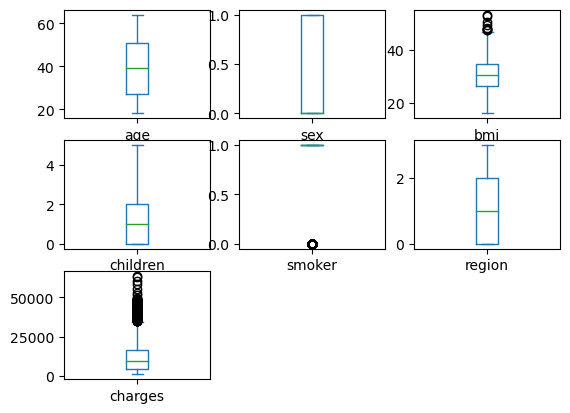

In [41]:
df.plot(kind = 'box', subplots = True, layout = (3,3))

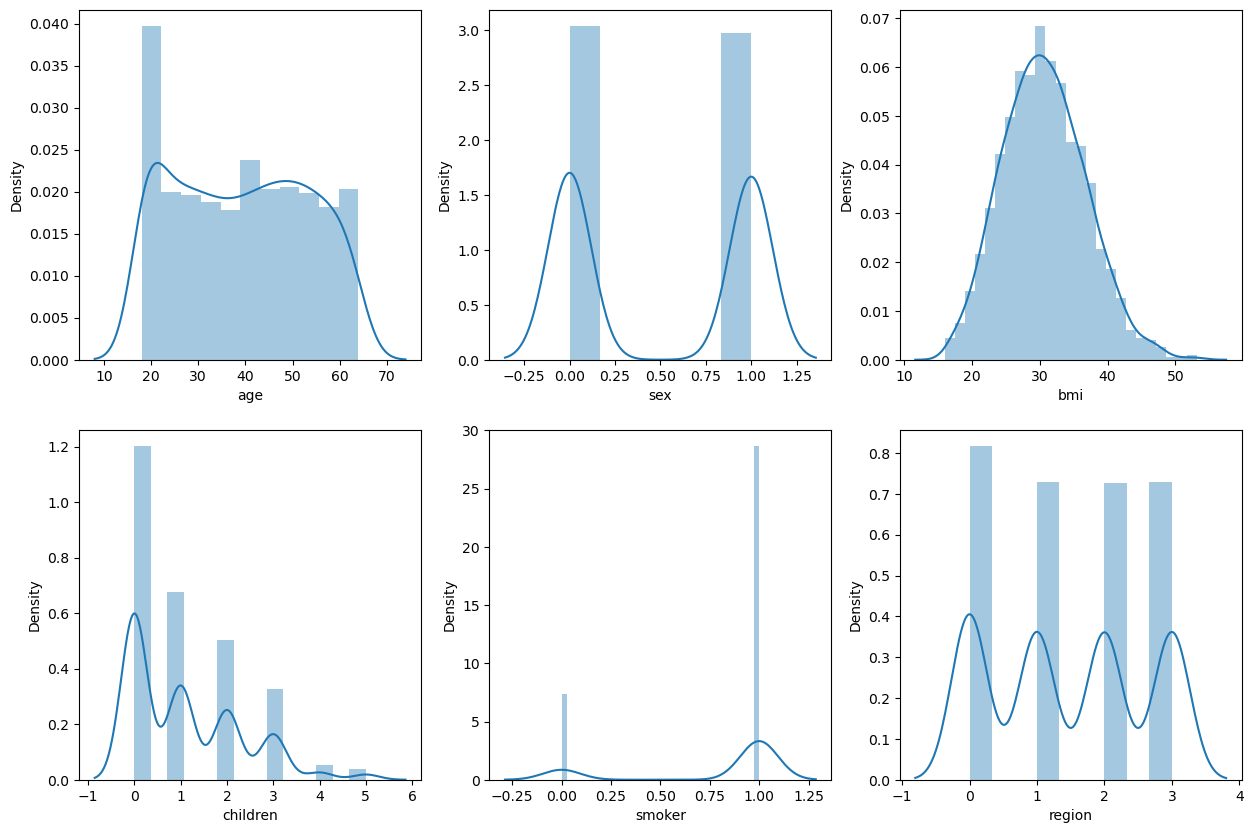

In [47]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
columns = df.iloc[:,:-1]
for col, value in columns.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.show()

<Axes: >

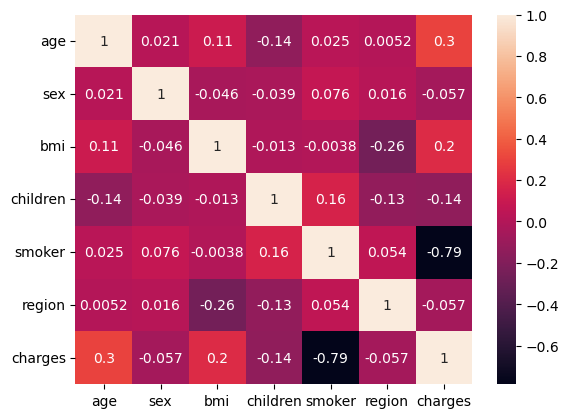

In [54]:
sns.heatmap(df.corr(),annot = True)

# Spliting the data into x and y variable

In [39]:
x = df.iloc[:,:-1]
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [42]:
y = df.iloc[:,-1]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Creating train and test data

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [44]:
x_train.shape

(1070, 6)

In [45]:
x_test.shape

(268, 6)

In [64]:
scaler  = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,1.010519,-0.453320,-0.908614,-1.970587,-0.403289
1,-1.509965,-0.989591,0.509621,-0.078767,0.507463,-1.287881
2,-0.797954,-0.989591,0.383307,1.580926,0.507463,-1.287881
3,-0.441948,-0.989591,-1.305531,-0.908614,0.507463,1.365894
4,-0.513149,-0.989591,-0.292556,-0.908614,0.507463,1.365894
...,...,...,...,...,...,...
1333,0.768473,-0.989591,0.050297,1.580926,0.507463,1.365894
1334,-1.509965,1.010519,0.206139,-0.908614,0.507463,0.481303
1335,-1.509965,1.010519,1.014878,-0.908614,0.507463,-1.287881
1336,-1.296362,1.010519,-0.797813,-0.908614,0.507463,-0.403289


# Model Selection

In [71]:
lm = LinearRegression()

In [72]:
lm.fit(x_train,y_train)

LinearRegression()

In [77]:
lm.score(x_train,y_train)

0.7413131194887537

In [79]:
pred= lm.predict(x_test)
pred

array([ 8597.28489536,  7231.74388195, 37039.23208958,  9616.21212862,
       27161.15504663, 11108.40935815,   354.21613174, 17042.35421504,
         747.16617118, 11372.94571472, 28400.38875084,  9533.99600035,
        5216.48749305, 38355.5614174 , 40201.25019476, 37046.88317993,
       15158.02888612, 35867.31947109,  9063.07424995, 31650.09572393,
        4122.46955807, 10389.18037453,  2647.70215941,  6752.0935722 ,
       11455.70143538, 12576.55372408, 14761.43409329,  6317.33228079,
        9588.04741124,  2138.14714947,  9375.87714427, 13225.72806329,
        4510.16138921,  3585.45839256,  4732.66994672, 12637.34626748,
        2260.33231947,  9078.92932601, 33459.16411947, 32548.1168527 ,
        4174.80105455,  4490.15618578, 14392.1262442 , 11588.95999023,
        8712.67197642, 12363.57345011,  5437.31098673,  3428.38801627,
       35447.7739549 ,  9084.07365487, 15767.62103266,  2302.7507234 ,
       12500.96481021,  1124.34689348, 13327.47845234, 12187.16682473,
      

In [80]:
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

4190.220190137917
33685623.35414443
5803.931715151758


In [81]:
print(r2_score(y_test,pred))

0.783021587162344


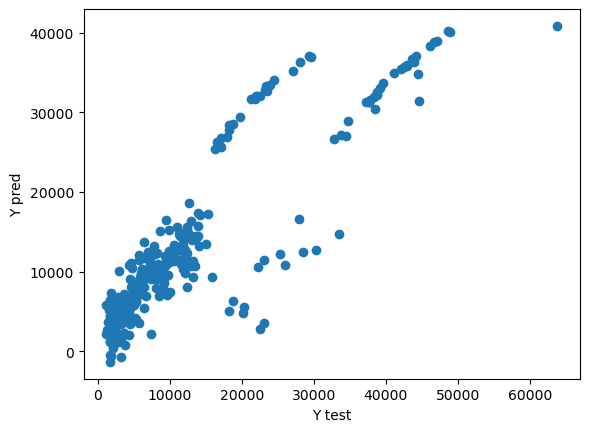

In [82]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [97]:
x_train

,age,sex,bmi,children,smoker,region
560,46,1,19.950,2,1,3
1285,47,1,24.320,0,1,2
1142,52,1,24.860,0,1,0
969,39,1,34.320,5,1,0
486,54,1,21.470,3,1,3
...,...,...,...,...,...,...
1095,18,1,31.350,4,1,2
1130,39,1,23.870,5,1,0
1294,58,0,25.175,0,1,2
860,37,1,47.600,2,0,1


In [99]:
t  = np.array([37,1,30.8,2,1,0])

In [104]:
t = t.reshape(1,-1)
p = lm.predict(t)

print("The medical insurance cost of the new customer is: ", p[0])

The medical insurance cost of the new customer is:  8097.584967424502
